In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../costa_rican_household/"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'sample_submission.csv', 'submission.ipynb', 'test.csv', 'train.csv']


In [9]:
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [6]:
train_df = pd.read_csv('../costa_rican_household/train.csv')
test_df = pd.read_csv('../costa_rican_household/test.csv')

In [10]:
print("Training dataframe shape:", train_df.shape)
print("Test dataframe shape:", test_df.shape)

Training dataframe shape: (9557, 143)
Test dataframe shape: (23856, 142)


In [11]:
train_df = train_df.fillna(0)
train_df.tail()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,...,81,2116,25,81,1,1.5625,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,0.0,0,...,0,4,25,81,1,1.5625,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,0.0,0,...,25,2500,25,81,1,1.5625,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,0.0,0,...,121,676,25,81,1,1.5625,0.0625,68.0625,676,2
9556,ID_a38c64491,80000.0,0,6,0,1,1,0,0.0,0,...,64,441,25,81,1,1.5625,0.0625,68.0625,441,2


In [12]:
one_df = train_df[train_df['Target'] == 1]
two_df = train_df[train_df['Target'] == 2]
three_df = train_df[train_df['Target'] == 3]
four_df = train_df[train_df['Target'] == 4]
print(len(one_df), len(two_df), len(three_df), len(four_df))

755 1597 1209 5996


In [150]:
# SMOTE
non_inputs = ['Id', 'Target']
smote = SMOTE(kind = "regular")

x_resampled = train_df[[c for c in train_df if c not in non_inputs]]
x_resampled = x_resampled[[c for c in x_resampled if x_resampled[c].dtype != 'O']]
y_resampled = train_df[['Target']]
x_res, y_res = smote.fit_sample(x_resampled, y_resampled)

train_y = pd.DataFrame({'Target':y_res[:]})
train_x = pd.DataFrame(x_res, columns = x_resampled.columns)

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
Counter(train_y['Target'])

Counter({4: 5996, 2: 5996, 3: 5996, 1: 5996})

In [ ]:
## Brute force oversampling
"""
one_df = one_df.sample(len(four_df), replace = True)
two_df = two_df.sample(len(four_df), replace = True)
three_df = three_df.sample(len(four_df), replace = True)
four_df = four_df.sample(len(four_df), replace = True)
print(len(one_df), len(two_df), len(three_df), len(four_df))

# new_training_df = pd.concat([one_df, two_df, three_df, four_df], axis = 0)
# new_training_df.head()

# train_x = new_training_df[[c for c in new_training_df if c not in non_inputs]]
# train_y = new_training_df[['Target']]

# train_x = train_x[[c for c in train_x if train_x[c].dtype != 'O']]
# train_y = train_y[[c for c in train_y if train_y[c].dtype != 'O']]
"""

In [16]:
clf = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=15)
clf.fit(train_x, train_y)

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
predictions = list(clf.predict(train_x))
true = train_y['Target'].tolist()
print(classification_report(true, predictions))

             precision    recall  f1-score   support

          1       0.99      0.99      0.99      5996
          2       0.99      0.98      0.99      5996
          3       0.99      0.98      0.99      5996
          4       0.98      1.00      0.99      5996

avg / total       0.99      0.99      0.99     23984



Feature ranking:
1. feature 135 (0.040939)
2. feature 98 (0.034490)
3. feature 134 (0.034430)
4. feature 71 (0.029407)
5. feature 94 (0.025029)
6. feature 118 (0.023716)
7. feature 131 (0.023638)
8. feature 132 (0.022685)
9. feature 14 (0.022232)
10. feature 68 (0.019632)
11. feature 65 (0.019523)
12. feature 133 (0.019145)
13. feature 2 (0.017694)
14. feature 109 (0.016959)
15. feature 15 (0.016822)
16. feature 11 (0.015765)
17. feature 95 (0.015533)
18. feature 9 (0.015509)
19. feature 116 (0.014701)
20. feature 22 (0.014535)
21. feature 13 (0.014467)
22. feature 17 (0.014346)
23. feature 30 (0.014302)
24. feature 108 (0.014275)
25. feature 0 (0.014107)
26. feature 10 (0.013666)
27. feature 97 (0.013094)
28. feature 8 (0.013063)
29. feature 16 (0.012702)
30. feature 21 (0.012691)
31. feature 12 (0.012261)
32. feature 18 (0.011792)
33. feature 130 (0.011594)
34. feature 31 (0.011579)
35. feature 6 (0.011358)
36. feature 129 (0.011328)
37. feature 7 (0.010646)
38. feature 55 (0.010244)

<Figure size 432x288 with 0 Axes>

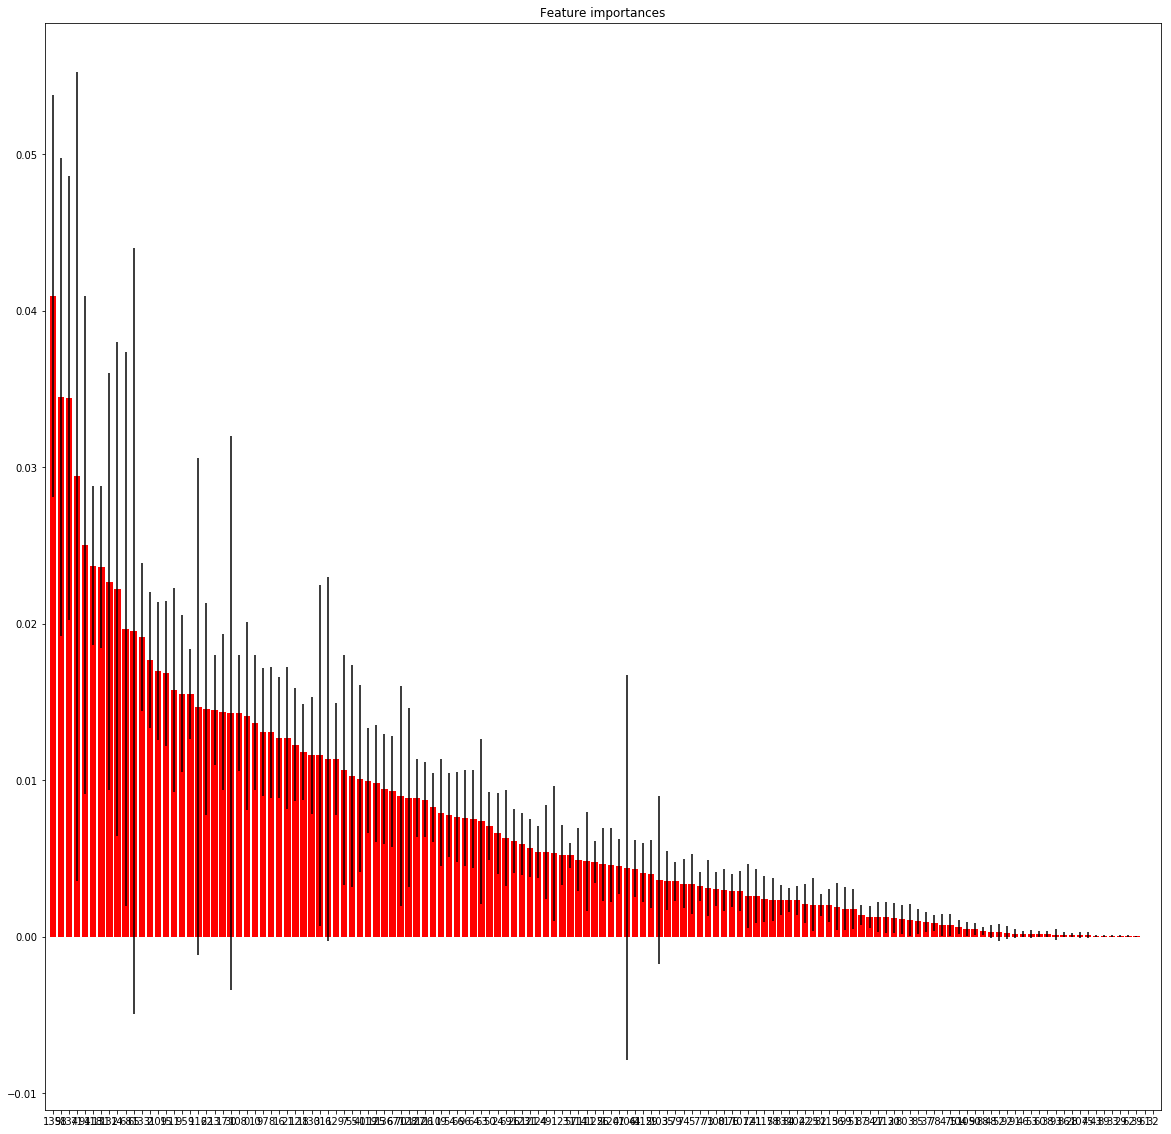

In [18]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
import_features = []
for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    import_features.append(indices[f])

# Plot the feature importances of the forest
plt.figure()
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [19]:
test_df = test_df.fillna(0)

In [20]:
test_x = test_df[[c for c in test_df if c not in non_inputs]]
test_x.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0.0,0,5,0,1,1,0,0.0,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,0.0,0,5,0,1,1,0,0.0,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,0.0,0,5,0,1,1,0,0.0,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,0.0,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,0.00,324


In [21]:
test_x = test_x[[c for c in test_x if test_x[c].dtype != 'O']]
test_x.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0.0,0,5,0,1,1,0,0.0,1,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,0.0,0,5,0,1,1,0,0.0,1,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,0.0,0,5,0,1,1,0,0.0,1,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,0.0,0,14,0,1,1,1,1.0,0,1,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,18,121,324,1,0,1,0.25,64.00,0.00,324


In [22]:
Counter(clf.predict(test_x))

Counter({4: 16610, 2: 3980, 3: 2066, 1: 1200})

In [23]:
ids = test_df['Id'].tolist()
targets = list(clf.predict(test_x))

In [24]:
submission = pd.DataFrame(list(zip(ids, targets)), columns=['Id', 'Target'])
submission.to_csv('sample_submission.csv', index=False)

## Keras work

In [28]:
import keras

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
print(len(train_x.as_matrix()), len(train_x))

23984 23984


/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [33]:
train_mat_x = train_x.as_matrix()

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [59]:
from keras.utils import to_categorical
#train_y = to_categorical(train_y['Target'])

In [139]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Activation
from keras import regularizers


classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 137, kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dropout(0.3))

# Adding the output layer
classifier.add(Dense(output_dim = 5, init = 'uniform', activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.01)))

# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=137, kernel_regularizer=<keras.reg..., units=6, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=6, kernel_initializer="uniform")`
  del sys.path[0]
/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", kernel_regularizer=<keras.reg..., units=5, kernel_initializer="uniform")`


In [140]:
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

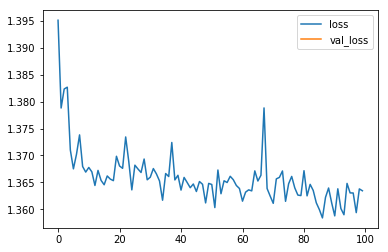

In [141]:
classifier.fit(train_x, train_y, batch_size = 5, nb_epoch = 100, callbacks=[plot_losses], verbose=0)

In [142]:
train_mat_x.shape

(23984, 137)

In [143]:
train_y.shape

(23984, 5)

In [144]:
train_pred = classifier.predict(train_x)
y_true = train_y

In [145]:
real_pred = []
for i in train_pred:
     real_pred.append((list(i).index((max(list(i))))))

In [152]:
pd.DataFrame(list(zip(real_pred, train_y['Target'])))

,0,1
0,3,4
1,3,4
2,4,4
3,3,4
4,3,4
5,3,4
6,3,4
7,3,4
8,3,4
9,3,4


In [158]:
preds = classifier.predict(test_x.as_matrix())

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [159]:
real_pred = []
for i in preds:
     real_pred.append((list(i).index((max(list(i))))))

In [164]:
sub = test_df[['Id']]
sub['Target'] = real_pred

/Users/pranavbarot/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1]:
sub.to_csv('submission4.csv', index = False)

NameError: name 'sub' is not defined